** First Steps for Dataset

Download the file https://physionet.org/physiobank/database/chbmit/chb03/chb03_12.edf


In [1]:
# Please start by installing those two Python packages
#!pip install pyedflib
#!pip install PyWavelets

In [2]:
# And load those libraries
!pip install pyedflib
import pyedflib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn import linear_model
import pywt
import matplotlib.patches as patches
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization,LSTM,Dense
from tensorflow.keras.utils import to_categorical


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.3 MB/s eta 0:00:00


In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the edf file
f = pyedflib.EdfReader("/content/drive/My Drive/Brain Dataset/chb07/chb03_12.edf")
n = f.signals_in_file
signal_labels = f.getSignalLabels()
sigbufs = np.zeros((n, f.getNSamples()[0]))
for i in np.arange(n):
    sigbufs[i, :] = f.readSignal(i)

# and load the data into a DataFrame
df_signals = pd.DataFrame(sigbufs)
df_signals = df_signals.transpose()
df_signals.columns = signal_labels

In [5]:
df_signals  #viewing the data

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8
0,-36.141636,0.586081,17.777778,6.837607,-18.168498,-15.433455,27.155067,-4.493284,-14.652015,-5.665446,...,24.420024,-4.102564,38.485958,-6.056166,33.797314,-17.387057,6.056166,-30.671551,52.551893,-4.102564
1,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
2,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
3,0.195360,0.195360,0.195360,0.195360,0.586081,0.195360,0.586081,-0.195360,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360,0.195360
4,-0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,-0.195360,0.586081,0.195360,0.195360,...,0.195360,0.195360,0.195360,0.195360,-0.195360,0.195360,-0.195360,0.195360,0.586081,0.195360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,-34.969475,-14.652015,16.214896,-7.619048,-71.306471,-25.201465,25.592186,28.327228,-75.213675,-25.201465,...,-32.625153,4.102564,3.321123,-30.671551,4.493284,-15.824176,21.684982,-5.665446,-34.578755,4.102564
921596,-35.360195,-6.837607,16.605617,-0.976801,-64.273504,-13.870574,17.387057,32.625153,-65.445665,-18.168498,...,-26.764347,3.711844,7.619048,-21.294261,-6.056166,-16.214896,16.605617,-3.711844,-28.327228,3.711844
921597,-31.062271,0.976801,15.824176,1.758242,-48.644689,-3.711844,12.307692,27.155067,-52.942613,-8.400488,...,-23.247863,4.102564,8.009768,-12.307692,-15.042735,-15.433455,13.479853,-6.837607,-20.903541,4.102564
921598,-19.731380,4.102564,17.387057,5.665446,-29.890110,5.274725,8.400488,22.857143,-41.611722,-2.148962,...,-17.777778,6.056166,9.963370,-6.446886,-17.387057,-16.996337,16.214896,-6.837607,-23.247863,6.056166


And our data has 921600 rows and 23 features .We have no missing values in our data ,also all features have floating point.

In [6]:
df_signals.isna().sum() #checking missing values

FP1-F7      0
F7-T7       0
T7-P7       0
P7-O1       0
FP1-F3      0
F3-C3       0
C3-P3       0
P3-O1       0
FP2-F4      0
F4-C4       0
C4-P4       0
P4-O2       0
FP2-F8      0
F8-T8       0
T8-P8       0
P8-O2       0
FZ-CZ       0
CZ-PZ       0
P7-T7       0
T7-FT9      0
FT9-FT10    0
FT10-T8     0
T8-P8       0
dtype: int64

In [7]:
df_signals.info() #checking basic info of our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921600 entries, 0 to 921599
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FP1-F7    921600 non-null  float64
 1   F7-T7     921600 non-null  float64
 2   T7-P7     921600 non-null  float64
 3   P7-O1     921600 non-null  float64
 4   FP1-F3    921600 non-null  float64
 5   F3-C3     921600 non-null  float64
 6   C3-P3     921600 non-null  float64
 7   P3-O1     921600 non-null  float64
 8   FP2-F4    921600 non-null  float64
 9   F4-C4     921600 non-null  float64
 10  C4-P4     921600 non-null  float64
 11  P4-O2     921600 non-null  float64
 12  FP2-F8    921600 non-null  float64
 13  F8-T8     921600 non-null  float64
 14  T8-P8     921600 non-null  float64
 15  P8-O2     921600 non-null  float64
 16  FZ-CZ     921600 non-null  float64
 17  CZ-PZ     921600 non-null  float64
 18  P7-T7     921600 non-null  float64
 19  T7-FT9    921600 non-null  float64
 20  FT9-

1.Introduction:

EEG stands for Electroencephalogram. It's a non-invasive technique used to record electrical activity in the brain. This is done by placing electrodes on the scalp, which pick up the electrical signals generated by the brain's neurons.

2.Temporal Resolution: EEG provides excellent temporal resolution, meaning it can capture changes in brain activity that occur in real-time. This makes it suitable for studying fast cognitive processes and even detecting abnormalities in brain function.

3.Frequency Analysis: EEG can break down brain signals into different frequency bands (like delta, theta, alpha, beta, and gamma waves). Different frequencies are associated with different states of brain activity, such as relaxation, alertness, or deep sleep.

4.Clinical Applications: EEG is used in clinical settings to diagnose and monitor various neurological disorders, such as epilepsy, sleep disorders, and certain brain injuries. It can also be used in neuropsychology to assess cognitive function.

5.Research on Brain Disorders: EEG recordings from individuals with different brain-related diseases, like epilepsy, Alzheimer's disease, or schizophrenia, can provide crucial insights into the specific neural patterns associated with these conditions.

6.Comparative Studies: By comparing EEG recordings from individuals with brain-related diseases to those from healthy controls, researchers can identify differences in brain activity. This can help in understanding the underlying mechanisms of these diseases and potentially lead to better treatments.

7.Experimental Studies: EEG is commonly used in experiments to investigate various aspects of cognition, such as attention, memory, perception, and language processing. Researchers can use EEG to track changes in brain activity while participants perform specific tasks.

8.Neurofeedback and Brain-Computer Interfaces: EEG can be used for neurofeedback, a technique where individuals learn to control their brainwave patterns. It's also a critical component of Brain-Computer Interfaces (BCIs) which enable direct communication between the brain and external devices.

Data:
A study was conducted at the Children's Hospital Boston where EEG was recorded on pediatric subjects with intractable (i.e. epileptic) seizures. There were 22 subjects in the study: 5 male, ages 3-22, and 17 females, ages 1.5-19; subject 21 was evaluated a second time 1.5 years later, thus re- sulting in 23 cases. Each case contains between 9 and 42 continuous .edf fles from a single subject, typically consisting of one hour each. Prior to measuring, subjects were taken of of any anti- seizure medication. The files can be found at https://physionet.org/physiobank/database/chbmit/

 EEG Samples:
Most of the EEG files have 23 recordings from electrodes placed around the head of the patient. Figures 1 and 2 present two EEG recordings of 10 seconds each. The first one was recorded at 1:43pm, while the patient was awake, and so should represent normal activity of the brain. The second one was recorded 50 minutes later. Within this 10 seconds, the patient experiences one epileptic seizure. As the size of the EEG makes it diffcult to assess how much bigger the amplitudes are when the patient is experiencing a seizure, Figure 3 zooms in on one channel for the non-seizure and seizure activity. Here we begin to see a marked difference between the two.

Preprocessing:
•	Pre-process the EEG signals to remove noise and artefacts. This includes applying Notch filtering to eliminate power line interference and using the Unscented Kalman Filter (UKF) to address baseline drift in EEG signals.

Feature Extraction:
•	Extract relevant features from the pre-processed EEG signals. This involves computing Power Spectral Density (PSD) using the Welch-Bartlett method to capture frequency domain information associated with different brain activities.

Temporal Characteristic Analysis:
•	Calculate statistical measures (mean, variance, standard deviation, skewness, and kurtosis) to capture temporal characteristics of brain activity and identify abnormalities.

Spatial Pattern Analysis:
•	Utilize Common Spatial Patterns to determine scalp topography and reveal spatial patterns specific to different brain states or tasks.

Interpretability and Visualization:
•	Focus on interpretability and understanding of the fused features. This is crucial in medical applications where insights into the prediction process are highly valuable for healthcare professionals.

Multi-modal Data Fusion:
•	Design a deep learning model capable of handling multi-modal data by fusing features from frequency, time, and spatial domains.

Model Selection:
•	Propose Long Short-Term Memory (LSTM) Recurrent Neural Networks (RNNs) as the underlying model to capture complex temporal or spatial patterns in the sequential data.

Optimization:
•	Utilize the Adam optimizer to find the optimal set of model parameters, which allows for efficient convergence and adaptive learning rate adjustments.

Training and Evaluation:
•	Train the deep learning model on the pre-processed EEG data, using appropriate performance metrics to monitor convergence and model performance.

Deployment:
•	Deploy the trained model to predict brain/nervous system-related diseases based on real-time or near-real-time EEG data.

Performance Metrics:
•	Use metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) to measure the model's predictive capability.






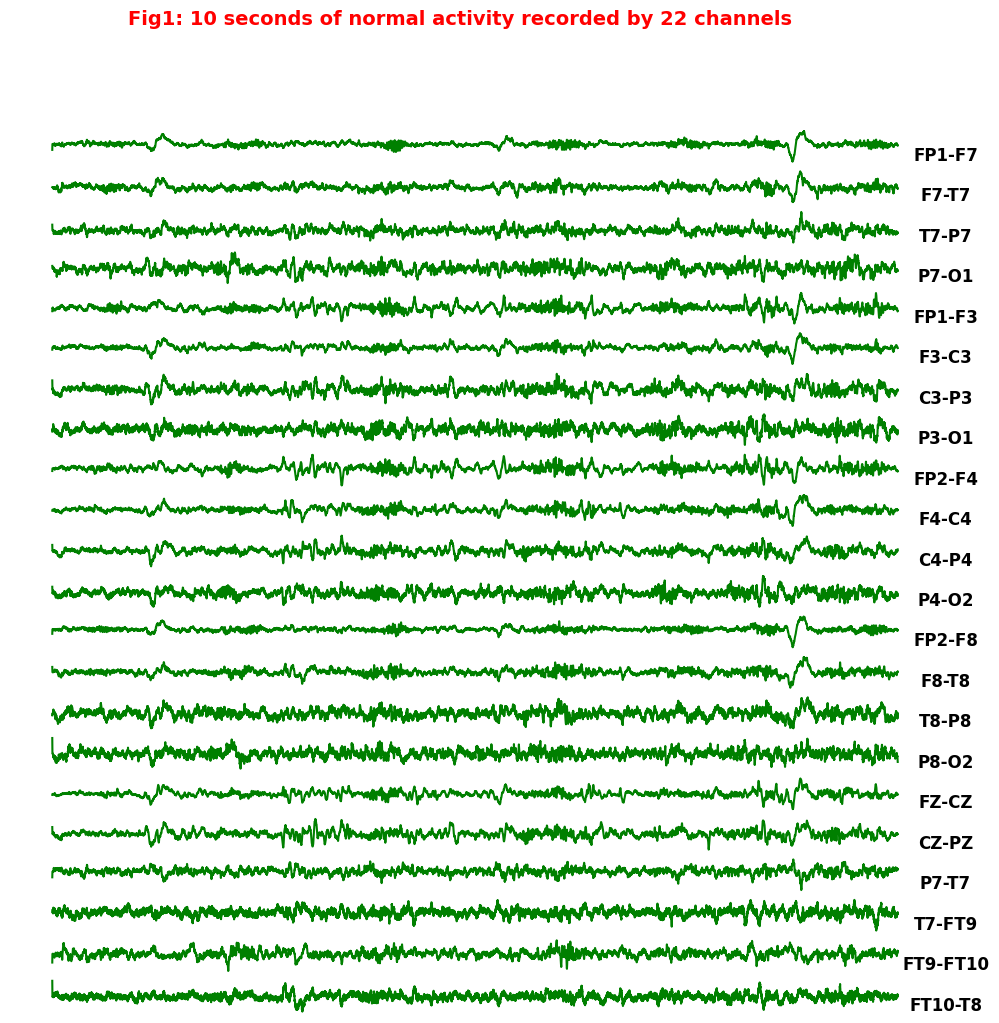

In [8]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns
plt.figure(figsize=(12,12))
plt.suptitle("Fig1: 10 seconds of normal activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[0:10240],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")


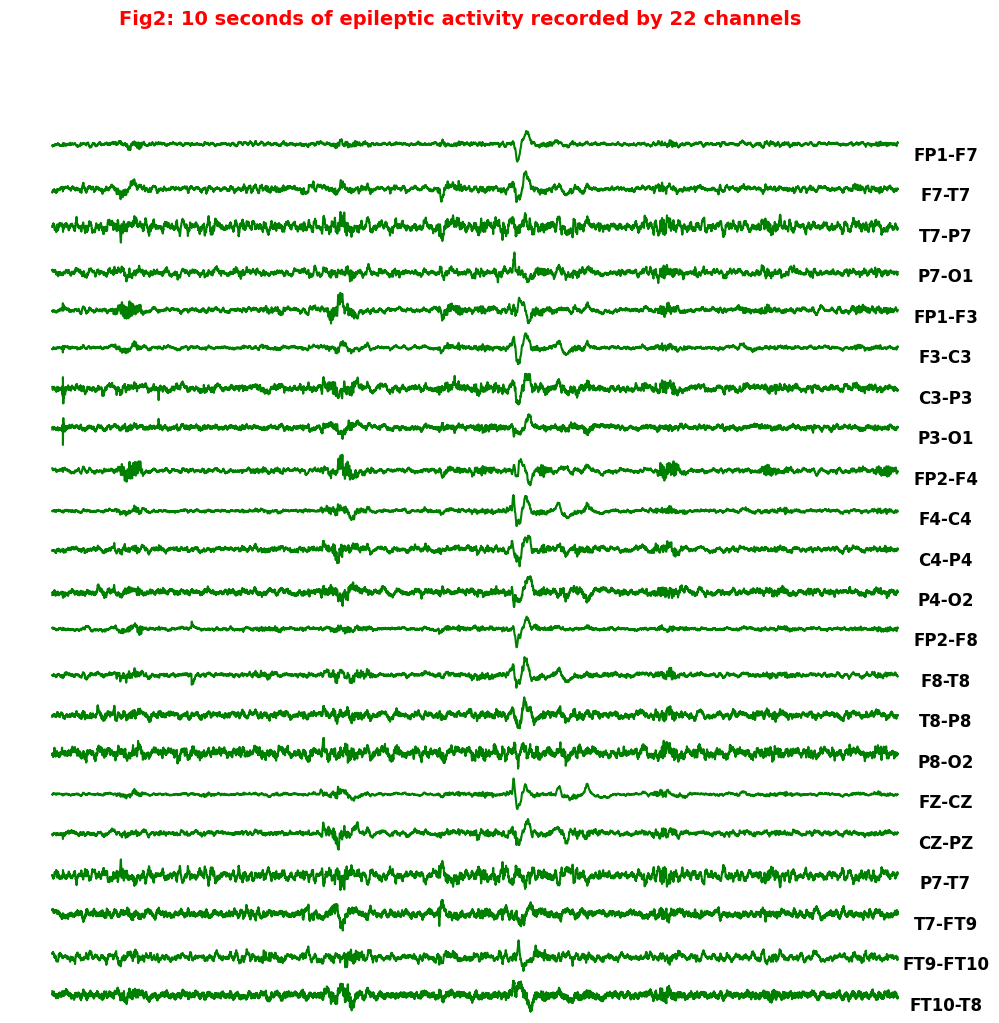

In [9]:
ax = ['ax'+str(i) for i in range(23)]
C = df_signals.columns

plt.figure(figsize=(12,12))
plt.suptitle("Fig2: 10 seconds of epileptic activity recorded by 22 channels", fontsize= 14,fontweight='bold',color='red')
for i in range(22):
    ax[i] = plt.subplot(23,1,i+1)
    ax[i].plot(df_signals[C[i]].iloc[766976:(777216)],"green")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off' ,length=0)
    ax[i].spines["top"].set_visible(False)
    ax[i].spines["bottom"].set_visible(False)
    ax[i].spines["right"].set_visible(False)
    ax[i].spines["left"].set_visible(False)
    ax[i].set_ylabel(C[i], fontsize=12, rotation=0,fontweight='bold')
    ax[i].yaxis.set_label_position("right")

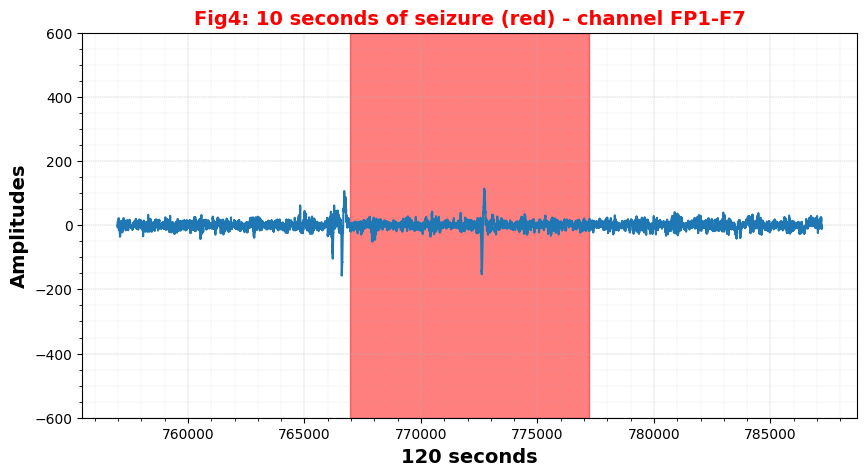

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df_signals['FP1-F7'].iloc[756976:787216])
plt.axvspan(766976, 777216, alpha=0.5, color='red')
plt.title("Fig4: 10 seconds of seizure (red) - channel FP1-F7", fontsize =14,fontweight='bold',color='red')
plt.xlabel("120 seconds", fontsize =14,fontweight='bold')
plt.ylabel("Amplitudes", fontsize =14,fontweight='bold')
plt.ylim((-600,600))
plt.grid(which = "major", linestyle='dashed',linewidth=0.3)
plt.grid(which = "minor", linewidth = 0.1,linestyle='dashed')
plt.minorticks_on()
plt.show()

In [11]:
#@title Data Preprocessing

In [12]:
!pip install mne
import mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 36.6 MB/s eta 0:00:00


To preprocess EEG signals and remove noise and artifacts, you can follow these steps:

Apply Notch Filtering:

Notch filtering is used to eliminate power line interference, which typically occurs at 50 or 60 Hz depending on the region.

Scipy:

SciPy is a collection of mathematical algorithms and convenience functions built on NumPy . It adds significant power to Python by providing the user with high-level commands and classes for manipulating and visualizing data.

Scipy Signal:

The signal processing toolbox currently contains some filtering functions, a limited set of filter design tools, and a few B-spline interpolation algorithms for 1- and 2-D data. While the B-spline algorithms could technically be placed under the interpolation category, they are included here because they only work with equally-spaced data and make heavy use of filter-theory and transfer-function formalism to provide a fast B-spline transform. To understand this section, you will need to understand that a signal in SciPy is an array of real or complex numbers.

For Unscented Kalman filter ,You can refer this documentation https://filterpy.readthedocs.io/en/latest/kalman/UnscentedKalmanFilter.html

Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Using matplotlib as 2D backend.


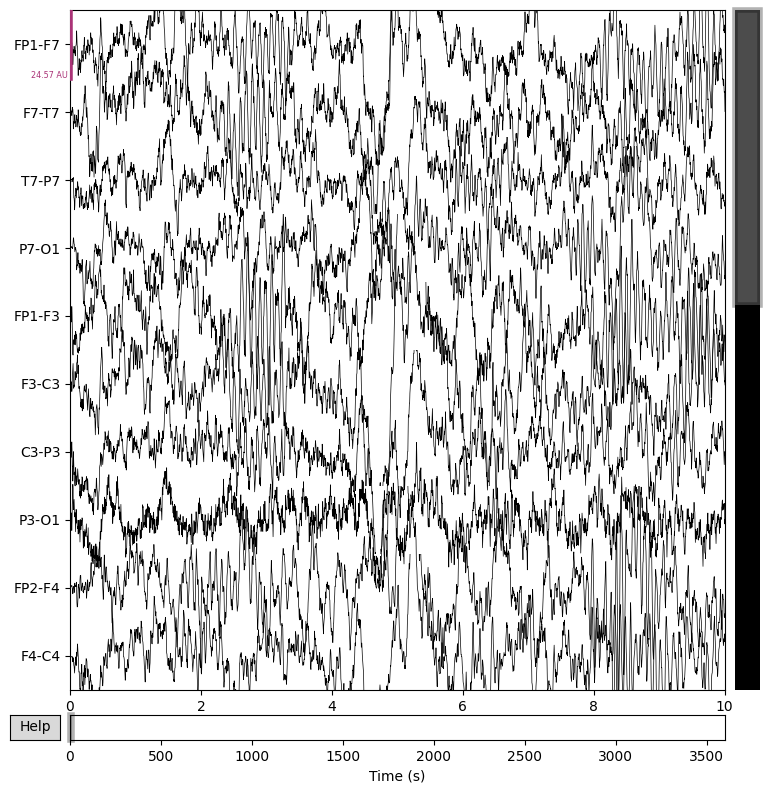

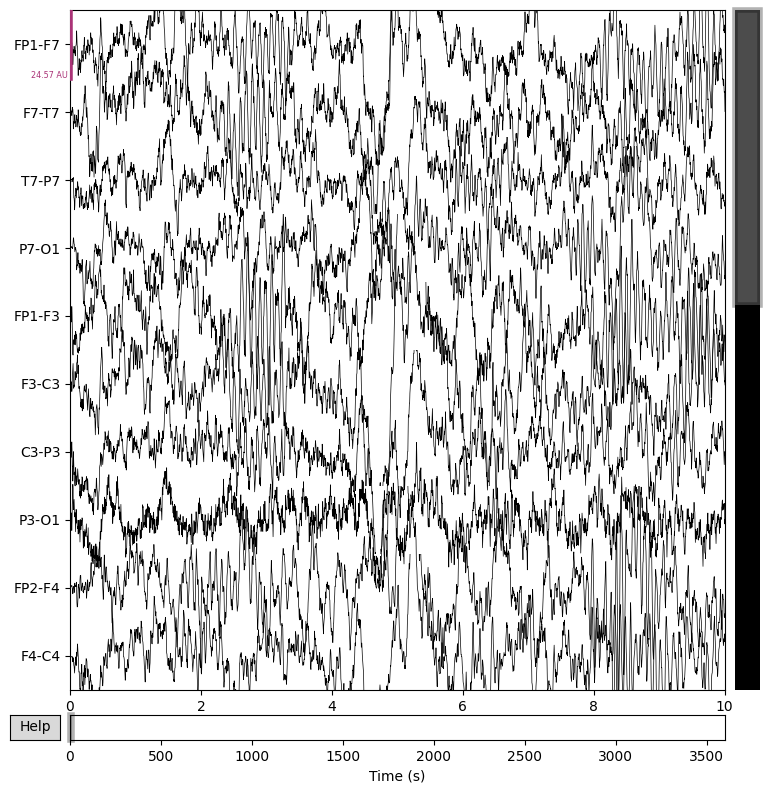

In [13]:


# Define the sampling frequency (in Hz) of your EEG data
sfreq = 256  # Example, replace with your actual sampling frequency




# Define channel indices
channel_indices = np.arange(n)  # Assuming sequential indices from 0 to n-1

    # Create an info structure for the data
info = mne.create_info(ch_names=signal_labels, sfreq=sfreq)

    # Create a raw MNE object from the data
raw = mne.io.RawArray(sigbufs, info)

    # Apply Notch filtering to remove power line interference
freqs = np.arange(50, 128, 50)
picks = channel_indices  # Use all channels
raw.notch_filter(freqs=freqs, picks=picks)



# Apply Unscented Kalman Filter to address baseline drift
raw.plot(duration=10, n_channels=10)  # Visualize data before filtering



In [14]:
raw.get_data()

array([[-3.61416361e+01, -1.14020556e-01,  1.00407209e-01, ...,
        -3.07606376e+01, -1.95448155e+01, -1.58241758e+01],
       [ 5.86080586e-01,  2.12618083e-01,  9.74143816e-03, ...,
         8.73871563e-01,  4.10931592e+00,  6.44688645e+00],
       [ 1.77777778e+01,  2.19222629e-01,  3.33229582e-01, ...,
         1.58367484e+01,  1.74313633e+01,  1.54334554e+01],
       ...,
       [-3.06715507e+01, -2.99346007e-01,  3.31801999e-02, ...,
        -6.89439495e+00, -6.57908501e+00, -1.95360195e-01],
       [ 5.25518926e+01,  7.42950892e-01,  3.99204888e-01, ...,
        -2.10482729e+01, -2.34114881e+01, -1.97313797e+01],
       [-4.10256410e+00,  1.17786916e-01,  2.31893428e-01, ...,
         3.81981895e+00,  5.87075183e+00,  5.27472527e+00]])

In [15]:
raw

<RawArray | 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

In [16]:
# Assuming 'raw' is your MNE RawArray object

# Get the data for three specific channels (replace [0, 1, 2] with the channel indices you're interested in)
subset_data = raw.get_data()[[0, 1, 2], :]

# Convert the data to a 3x3 matrix
matrix_3x3 = subset_data[:, :3]  # Assuming you want the first 3 samples

print("3x3 Matrix:")
print(matrix_3x3)


3x3 Matrix:
[[-3.61416361e+01 -1.14020556e-01  1.00407209e-01]
 [ 5.86080586e-01  2.12618083e-01  9.74143816e-03]
 [ 1.77777778e+01  2.19222629e-01  3.33229582e-01]]


In [17]:
raw.get_data().shape

(23, 921600)

In [18]:
# Reshape the data for efficient processing
n_channels, n_times = raw.get_data().shape
reshaped_data = raw.get_data().T.reshape(n_times, n_channels)

In [19]:
# Check the shape of the array
print("Shape of reshaped_data:", reshaped_data.shape)

Shape of reshaped_data: (921600, 23)


In [20]:
n_channels

23

In [21]:
n_times

921600

In [22]:
reshaped_data

array([[-3.61416361e+01,  5.86080586e-01,  1.77777778e+01, ...,
        -3.06715507e+01,  5.25518926e+01, -4.10256410e+00],
       [-1.14020556e-01,  2.12618083e-01,  2.19222629e-01, ...,
        -2.99346007e-01,  7.42950892e-01,  1.17786916e-01],
       [ 1.00407209e-01,  9.74143816e-03,  3.33229582e-01, ...,
         3.31801999e-02,  3.99204888e-01,  2.31893428e-01],
       ...,
       [-3.07606376e+01,  8.73871563e-01,  1.58367484e+01, ...,
        -6.89439495e+00, -2.10482729e+01,  3.81981895e+00],
       [-1.95448155e+01,  4.10931592e+00,  1.74313633e+01, ...,
        -6.57908501e+00, -2.34114881e+01,  5.87075183e+00],
       [-1.58241758e+01,  6.44688645e+00,  1.54334554e+01, ...,
        -1.95360195e-01, -1.97313797e+01,  5.27472527e+00]])

In [23]:
freqs

array([ 50, 100])

In [24]:
picks

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22])

In [25]:
!pip install pykalman
import pykalman
# Apply Unscented Kalman Filter to address baseline drift
ukf = pykalman.UnscentedKalmanFilter(initial_state_mean=np.zeros(n_channels),
                                     n_dim_obs=n_channels)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.9/228.9 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48443 sha256=4b2769141e99a3e142a17be2f46f24b7ca3681df1dc28a1965467ac550aed11d
  Stored in directory: /root/.cache/pip/wheels/76/33/ef/5f332226e13a5089c6dd4b01cc2bcb59491d18f955fa2d3807
Successfully built pykalman


In [26]:
ukf

In [27]:
# Initialize variables for storing filtered data
filtered_data = np.zeros_like(reshaped_data)


1.	Data Collection and Curation:
•	Collect a large and well-curated dataset of EEG recordings, including samples from individuals with different brain-related diseases and healthy controls.
2.	Model Validation:
•	Validate the deep learning algorithm on an independent dataset to verify its generalizability. This proposed model is implemented using Python software.
3.	Data Pre-processing:
•	Pre-process the EEG signals to remove noise and artefacts. This includes applying Notch filtering to eliminate power line interference and using the Unscented Kalman Filter (UKF) to address baseline drift in EEG signals.
4.	Feature Extraction:
•	Extract relevant features from the pre-processed EEG signals. This involves computing Power Spectral Density (PSD) using the Welch-Bartlett method to capture frequency domain information associated with different brain activities.
5.	Temporal Characteristic Analysis:
•	Calculate statistical measures (mean, variance, standard deviation, skewness, and kurtosis) to capture temporal characteristics of brain activity and identify abnormalities.
6.	Spatial Pattern Analysis:
•	Utilize Common Spatial Patterns to determine scalp topography and reveal spatial patterns specific to different brain states or tasks.
7.	Interpretability and Visualization:
•	Focus on interpretability and understanding of the fused features. This is crucial in medical applications where insights into the prediction process are highly valuable for healthcare professionals.
8.	Multi-modal Data Fusion:
•	Design a deep learning model capable of handling multi-modal data by fusing features from frequency, time, and spatial domains.
9.	Model Selection:
•	Propose Long Short-Term Memory (LSTM) Recurrent Neural Networks (RNNs) as the underlying model to capture complex temporal or spatial patterns in the sequential data.
10.	Optimization:
•	Utilize the Adam optimizer to find the optimal set of model parameters, which allows for efficient convergence and adaptive learning rate adjustments.
11.	Training and Evaluation:
•	Train the deep learning model on the pre-processed EEG data, using appropriate performance metrics to monitor convergence and model performance.
12.	Deployment:
•	Deploy the trained model to predict brain/nervous system-related diseases based on real-time or near-real-time EEG data.
13.	Performance Metrics:
•	Use metrics such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC) to measure the model's predictive capability.



In [28]:
!pip install pykalman

Creating RawArray with float64 data, n_channels=23, n_times=921600
    Range : 0 ... 921599 =      0.000 ...  3599.996 secs
Ready.


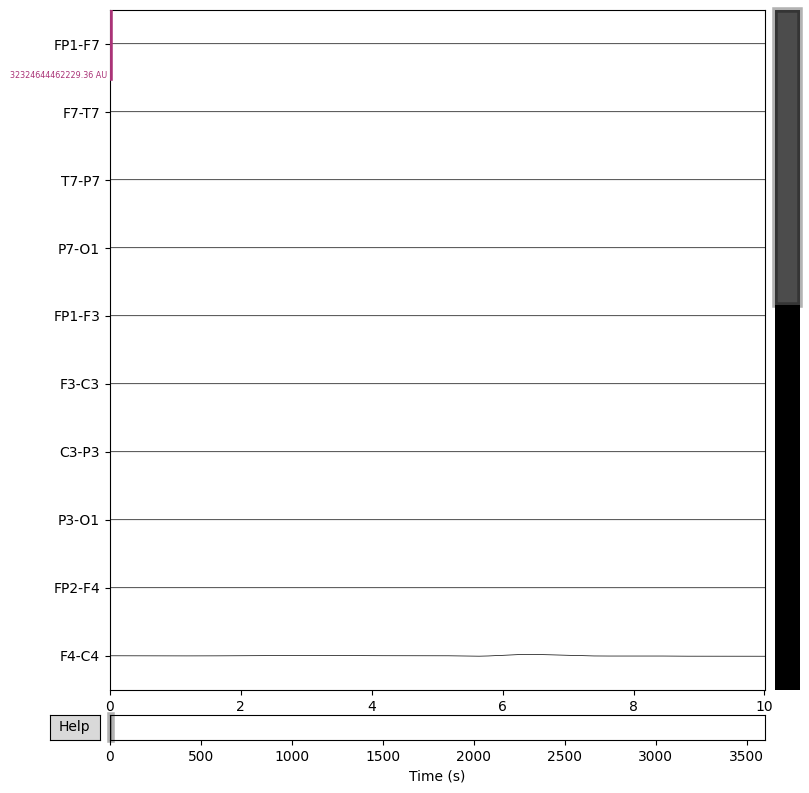

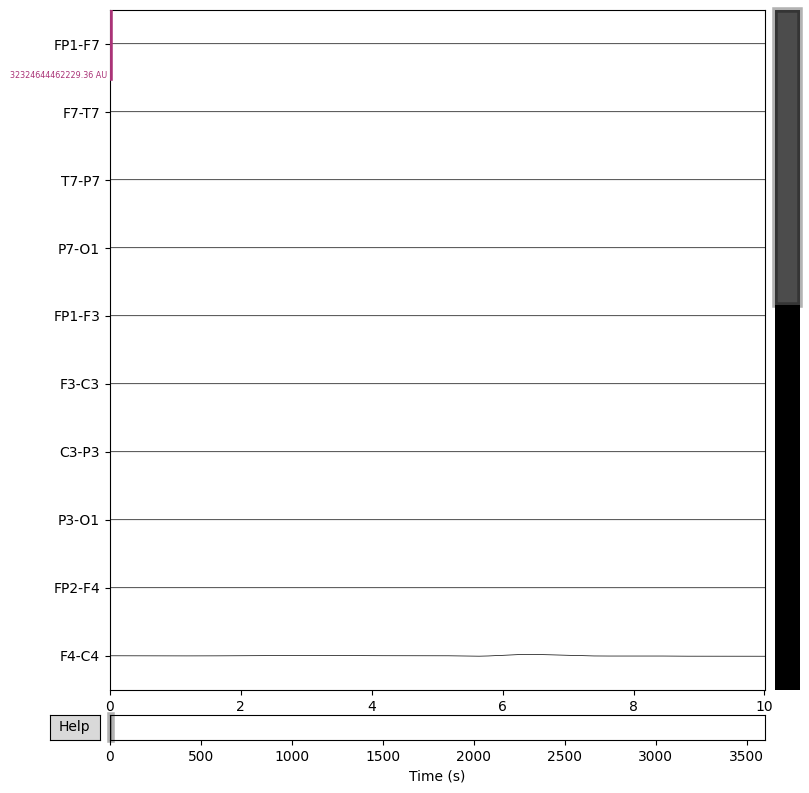

In [29]:
import numpy as np
import mne
from scipy.signal import lfilter

# Define the notch filter function
def notch_filter(data, center_freq, Q, fs):
    w0 = 2 * np.pi * center_freq / fs
    r = np.cos(w0)
    a = np.array([1, -2*r, r**2])
    b = np.array([1, -2*r*np.cos(w0), r**2])
    return lfilter(b, a, data, axis=0)

# Define UKF parameters
Q_process = np.eye(23) * 1e-5  # Process noise covariance
R_measurement = np.eye(23) * 1e-2  # Measurement noise covariance

# Initialize state and covariance estimates
x_hat = np.zeros(23)  # Initial state estimate
P = np.eye(23) * 1e-3  # Initial covariance estimate

# Define the Unscented Kalman Filter
def ukf(data):
    global x_hat, P  # Declare x_hat and P as global variables

    # Initialize variables for storing filtered data
    ukf_filtered_data = np.zeros_like(data)

    # Iterate through the data
    for i in range(len(data[0])):
        # Prediction step (time update)
        x_hat_minus = x_hat
        P_minus = P + Q_process

        # Apply notch filter operation
        x_hat_minus = notch_filter(x_hat_minus, center_freq, Q, fs)

        # Measurement update
        K = P_minus @ np.linalg.inv(P_minus + R_measurement)
        x_hat = x_hat_minus + K @ (data[:, i] - x_hat_minus)
        P = (np.eye(23) - K) @ P_minus

        # Store the filtered data
        ukf_filtered_data[:, i] = x_hat

    return ukf_filtered_data

# Assuming 'raw' is your MNE RawArray object with notch-filtered data
fs = raw.info['sfreq']  # Sampling frequency
center_freq = 50  # Notch frequency in Hz
Q = 30  # Quality factor

# Apply notch filter to the raw data
filtered_data = notch_filter(raw.get_data(), center_freq, Q, fs)

# Apply Unscented Kalman Filter
ukf_filtered_data = ukf(filtered_data)

# Create an info structure for the filtered data
info_filtered = mne.create_info(ch_names=raw.ch_names, sfreq=fs)

# Create a new raw MNE object from the filtered data
raw_filtered = mne.io.RawArray(ukf_filtered_data, info_filtered)

# Plot the filtered data
raw_filtered.plot(duration=10, n_channels=10)


In [30]:
raw_filtered

<RawArray | 23 x 921600 (3600.0 s), ~161.7 MB, data loaded>

Setting up band-pass filter from 0.1 - 1e+02 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.10, 100.00 Hz: -6.02, -6.02 dB



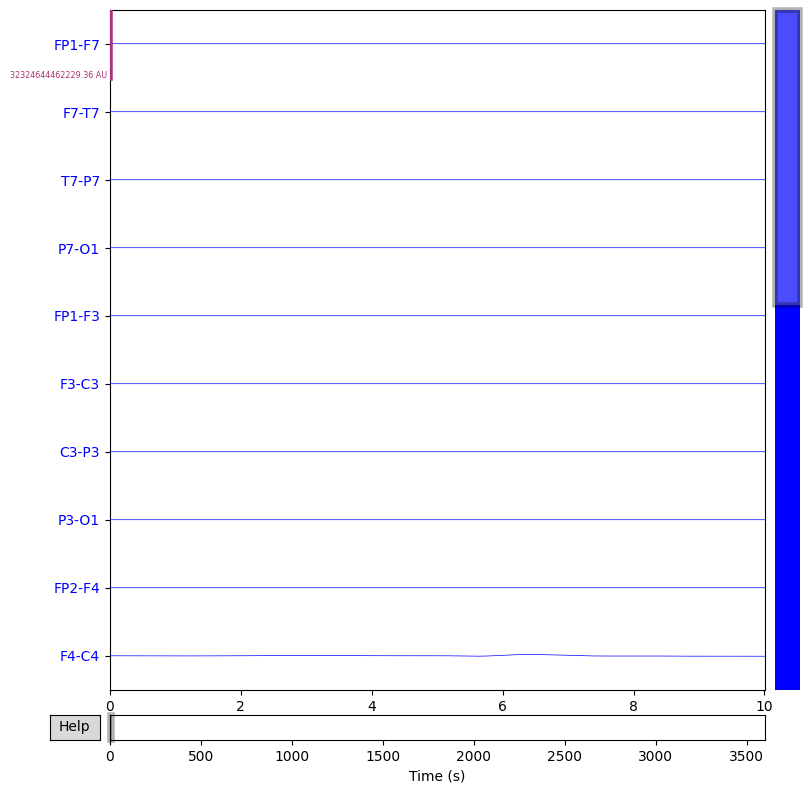

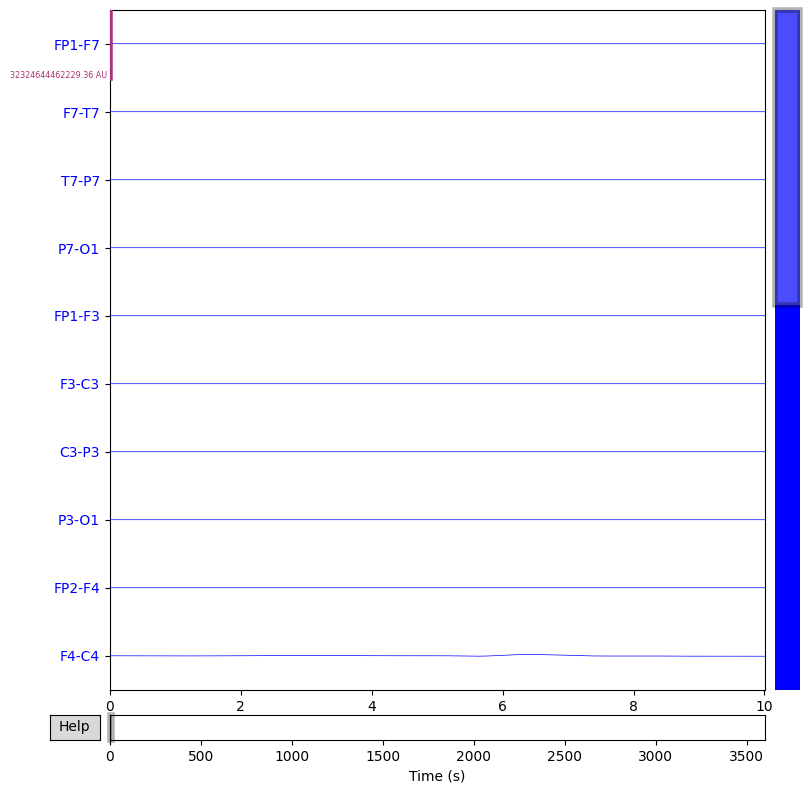

In [31]:
# Plot the filtered data with more details
raw_filtered.plot(duration=10, n_channels=10, scalings='auto', color='b',
                  title='Filtered EEG Data', show=True, block=True,
                  highpass=0.1, lowpass=100, remove_dc=True,
                  show_options=True)

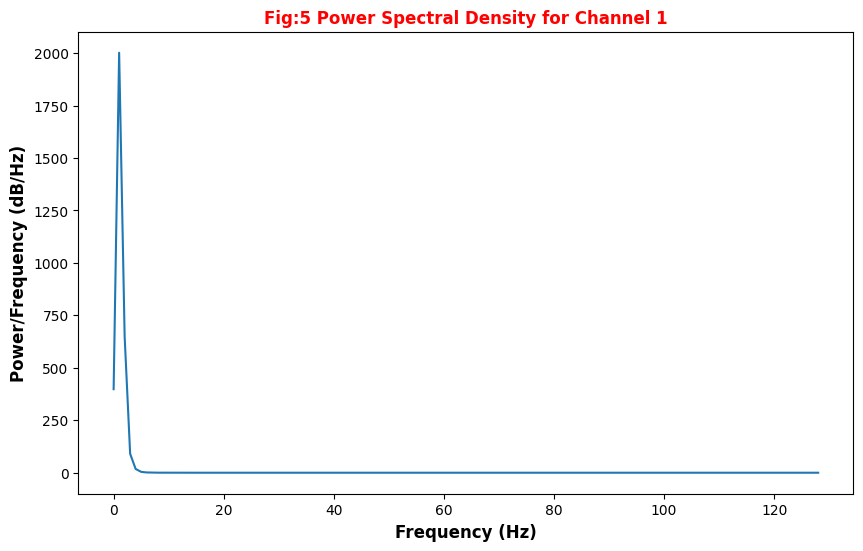

In [93]:
#@title Feature Extraction

#Welch's technique to reduce the variance of the periodogram breaks the time series into segments, usually overlapping.
#Welch's method computes a modified periodogram for each segment and then averages these estimates to produce the estimate of the power spectral density.

from scipy.signal import welch

# Define parameters for the Welch method
nperseg = 256  # Length of each segment (adjust as needed)
noverlap = nperseg // 2  # Overlap between segments (adjust as needed)
fs = sfreq  # Sampling frequency
n_channels=23
# Compute PSD for each channel
psd_data = np.zeros((n_channels, nperseg//2 + 1))

for i in range(n_channels):
    # Compute PSD using Welch method
    f, psd = welch(raw_filtered.get_data()[i], fs=fs, nperseg=nperseg, noverlap=noverlap)
    psd_data[i] = psd

# 'f' contains the frequency bins, 'psd_data' contains the power spectral density

# Optionally, you can plot the PSD for a specific channel
import matplotlib.pyplot as plt

channel_index = 1 # Change to the desired channel index
plt.figure(figsize=(10, 6))
plt.plot(f, psd_data[channel_index])
plt.xlabel('Frequency (Hz)',fontweight='bold',fontsize=12)
plt.ylabel('Power/Frequency (dB/Hz)',fontweight='bold',fontsize=12)
plt.title(f'Fig:5 Power Spectral Density for Channel {channel_index}',fontweight='bold',fontsize=12,color='red')

plt.show()


In [94]:
#@title Temporal Charectristic  Analysis


import scipy.stats

# Calculate statistical measures for each channel's PSD
statistical_measures = []

for i in range(n_channels):
    # Calculate mean, variance, standard deviation, skewness, and kurtosis
    mean = np.mean(psd_data[i])
    variance = np.var(psd_data[i])
    std_dev = np.std(psd_data[i])
    skewness = scipy.stats.skew(psd_data[i])
    kurtosis = scipy.stats.kurtosis(psd_data[i])

    # Store the results in a dictionary or data structure
    channel_stats = {
        'Channel': i,
        'Mean': mean,
        'Variance': variance,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurtosis
    }
    statistical_measures.append(channel_stats)

# Convert the list of dictionaries to a DataFrame for easier analysis
import pandas as pd

df_statistics = pd.DataFrame(statistical_measures)

# Print or analyze the DataFrame containing the statistical measures
print(df_statistics)


    Channel          Mean      Variance  Standard Deviation   Skewness  \
0         0  2.158656e-01  2.057714e+00        1.434473e+00   8.527405   
1         1  2.453456e+01  3.503491e+04        1.871761e+02   9.489659   
2         2  3.264721e+03  7.104931e+08        2.665508e+04  10.007341   
3         3  4.791548e+05  1.627396e+13        4.034099e+06  10.230741   
4         4  7.453652e+07  4.063196e+17        6.374321e+08  10.333525   
5         5  1.199625e+10  1.090127e+22        1.044091e+11  10.449215   
6         6  1.987880e+12  3.116648e+26        1.765403e+13  10.578720   
7         7  3.395864e+14  9.381859e+30        3.062982e+15  10.669380   
8         8  5.953477e+16  2.936165e+35        5.418639e+17  10.716822   
9         9  1.062341e+19  9.482322e+39        9.737722e+19  10.751934   
10       10  1.919878e+21  3.149142e+44        1.774582e+22  10.793586   
11       11  3.511791e+23  1.072331e+49        3.274646e+24  10.835934   
12       12  6.501772e+25  3.729972e+5

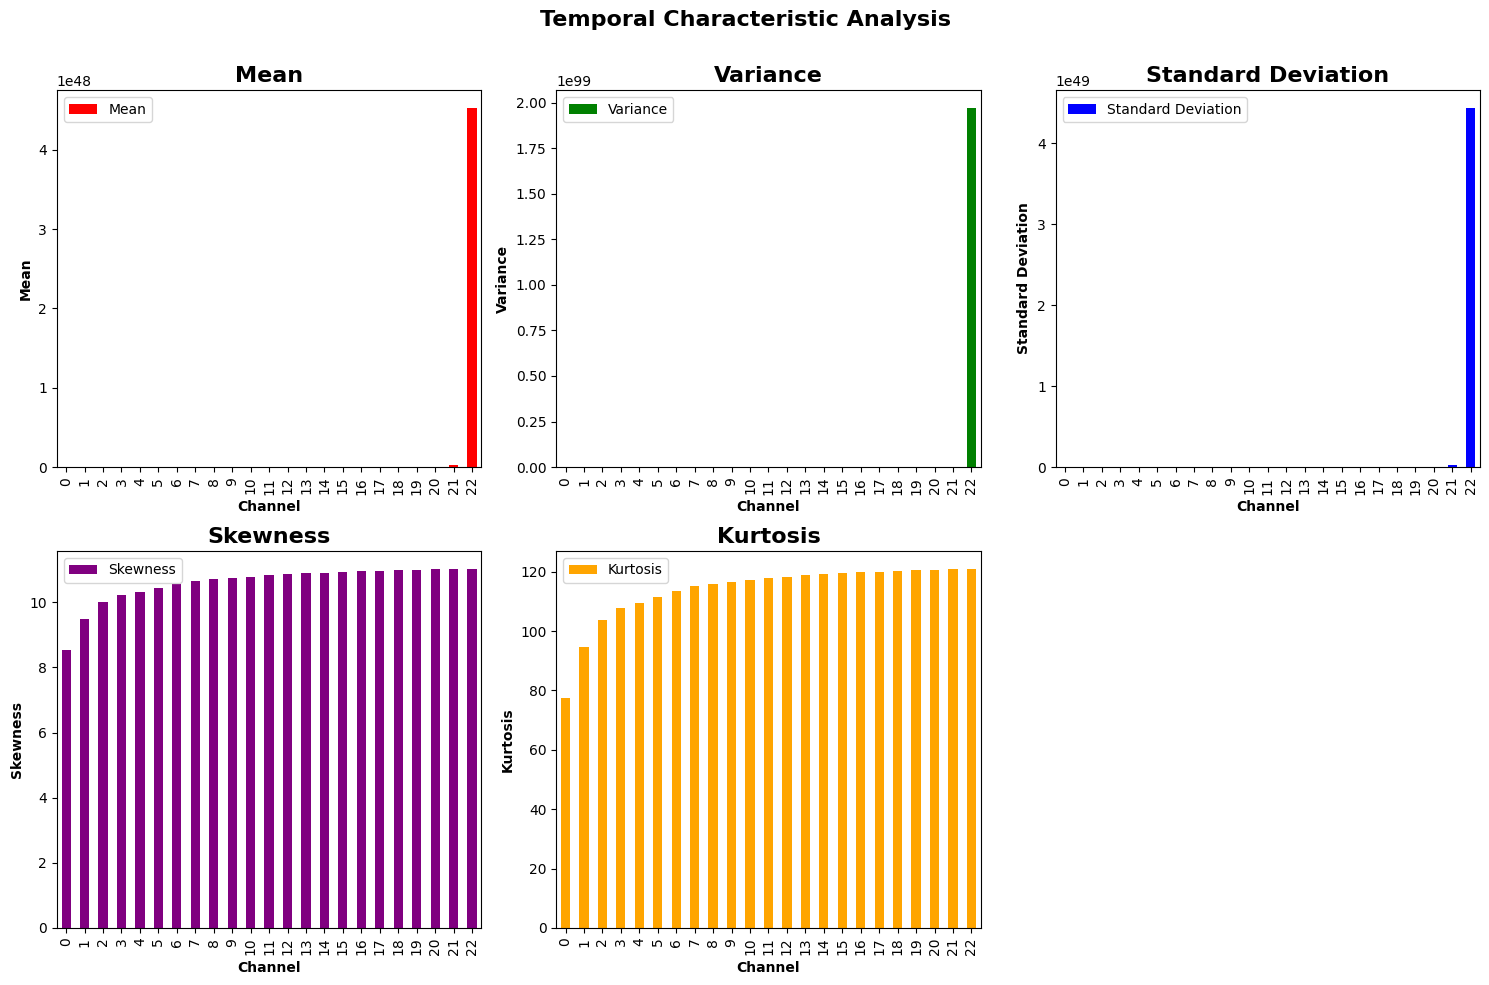

In [95]:
import matplotlib.pyplot as plt

# Assuming 'df_statistics' contains your DataFrame

# Define a list of colors for the bars
colors = ['red', 'green', 'blue', 'purple', 'orange']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Temporal Characteristic Analysis', fontsize=16, fontweight='bold')

# Plot Mean
df_statistics.plot(x='Channel', y='Mean', kind='bar', ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('Mean', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Channel', fontweight='bold')
axes[0, 0].set_ylabel('Mean', fontweight='bold')

# Plot Variance
df_statistics.plot(x='Channel', y='Variance', kind='bar', ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Variance', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Channel', fontweight='bold')
axes[0, 1].set_ylabel('Variance', fontweight='bold')

# Plot Standard Deviation
df_statistics.plot(x='Channel', y='Standard Deviation', kind='bar', ax=axes[0, 2], color=colors[2])
axes[0, 2].set_title('Standard Deviation', fontsize=16, fontweight='bold')
axes[0, 2].set_xlabel('Channel', fontweight='bold')
axes[0, 2].set_ylabel('Standard Deviation', fontweight='bold')

# Plot Skewness
df_statistics.plot(x='Channel', y='Skewness', kind='bar', ax=axes[1, 0], color=colors[3])
axes[1, 0].set_title('Skewness', fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Channel', fontweight='bold')
axes[1, 0].set_ylabel('Skewness', fontweight='bold')

# Plot Kurtosis
df_statistics.plot(x='Channel', y='Kurtosis', kind='bar', ax=axes[1, 1], color=colors[4])
axes[1, 1].set_title('Kurtosis', fontsize=16, fontweight='bold')
axes[1, 1].set_xlabel('Channel', fontweight='bold')
axes[1, 1].set_ylabel('Kurtosis', fontweight='bold')

# Hide the last subplot
fig.delaxes(axes[1, 2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.subplots_adjust(top=0.9)
plt.show()


In [35]:
#@title Spatial Pattern Analysis



In [98]:
psd_data.shape

(23, 129)

In [36]:
# Assuming 'raw' is your MNE Raw object
info = raw.info

info

<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>

In [37]:
# Assuming 'raw_filtered' is your MNE RawArray object
info = raw_filtered.info

# Print the information (optional)
print(info)


<Info | 7 non-empty values
 bads: []
 ch_names: FP1-F7, F7-T7, T7-P7, P7-O1, FP1-F3, F3-C3, C3-P3, P3-O1, ...
 chs: 23 misc
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 23
 projs: []
 sfreq: 256.0 Hz
>


In [75]:
import numpy as np
import mne

# Load the EEG data
# Assuming 'raw' is your EEG data (already loaded)
# Example:
# raw = mne.io.read_raw_edf('path_to_your_data.edf', preload=True)

# Define event information (time in seconds)
event_times = [2.3, 5.7, 8.2,9.4,8.6,7.9,6.3,7.8,9.3,8.6,6.5,7.2,3.5,4.2,6.5,7.4,8.3,9.3,8.5,8.4,8.2,7.6,7.7]  # Example times, replace with actual event times
event_ids = [1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]  # Example event IDs, replace with actual event IDs

# Convert event times to sample indices
sfreq = raw.info['sfreq']  # Sampling frequency in Hz
event_samples = (np.array(event_times) * sfreq).astype(int)

# Create events array
events = np.column_stack((event_samples, np.zeros(len(event_samples), dtype=int), event_ids))

# Add events to the raw data
raw.add_events(events, stim_channel='FP1-F7')

# Define event IDs (replace with your actual event IDs)
event_id = dict(event_1=1, event_2=2, event_3=3)  # Example event IDs

# Define epochs around the events
tmin, tmax = -1.0, 2.0  # Define the time window (in seconds) around the events

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None, preload=True)

# Now you have epochs around the manually defined events for further analysis


Not setting metadata
3 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 3 events and 769 original time points ...
0 bad epochs dropped


In [76]:
event_samples

array([ 588, 1459, 2099, 2406, 2201, 2022, 1612, 1996, 2380, 2201, 1664,
       1843,  896, 1075, 1664, 1894, 2124, 2380, 2176, 2150, 2099, 1945,
       1971])

In [83]:
events

array([[ 588,    0,    1],
       [1459,    0,    2],
       [2099,    0,    3],
       [2406,    0,    4],
       [2201,    0,    5],
       [2022,    0,    6],
       [1612,    0,    7],
       [1996,    0,    8],
       [2380,    0,    9],
       [2201,    0,   10],
       [1664,    0,   11],
       [1843,    0,   12],
       [ 896,    0,   13],
       [1075,    0,   14],
       [1664,    0,   15],
       [1894,    0,   16],
       [2124,    0,   17],
       [2380,    0,   18],
       [2176,    0,   19],
       [2150,    0,   20],
       [2099,    0,   21],
       [1945,    0,   22],
       [1971,    0,   23]])

In [84]:

from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score

from mne import Epochs, pick_types, events_from_annotations
from mne.channels import make_standard_montage
from mne.io import concatenate_raws, read_raw_edf
from mne.decoding import CSP

epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2
# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data()
epochs_data_train = epochs_train.get_data()
cv = ShuffleSplit(25, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)



In [90]:
# ... (previous code remains the same)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])

# Use a different cross-validation scheme (e.g., KFold with 5 splits)
from sklearn.model_selection import KFold
cv = KFold(n_splits=2, shuffle=True, random_state=42)



In [92]:
# Perform cross-validation
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv,error_score="raise")



ValueError: ignored